## Mean Shift      p.427~

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [72]:
# 데이터 생성 : X => 데이터, y => target
X,y = make_blobs(
      n_samples=200
    , n_features= 2
    , centers= 3    # 중심점 개수(군집됟 label 개수)
    , cluster_std=0.8  # 표준편차
    , random_state=0
)

In [53]:
mean_shift = MeanShift(bandwidth=0.8)   # bandwidth : 표준편차로 생각하기
cluster_labels = mean_shift.fit_predict(X)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

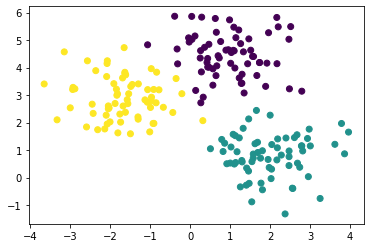

In [24]:
# 임의생성된 데이터의 시각화
plt.scatter(x=X[:, 0], y=X[:, 1], c = y)

원래 군집화3개로 한 label인 y로 구분했을 때 위와 같이 당연히 3개로 시각화된다.

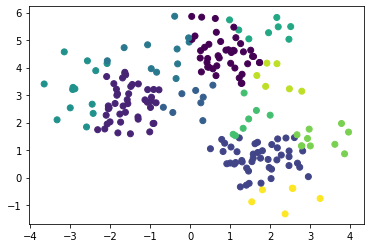

In [54]:
# 위 데이터(2개의 features)를 Meanshft 로 군집화한 결과를 시각화
plt.scatter(x=X[:, 0], y=X[:, 1], c = cluster_labels)

In [55]:
# bandwidth에 따라 달라지는 군집 중심점 개수
np.unique(cluster_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([42, 44, 45,  8, 11, 13,  8,  7, 10,  6,  6], dtype=int64))

 - 원래 데이터 만들때 3개의 중심점으로 만들었지만, 0.8의 표준편차로 Meanshift 로 군집화한 결과는 3개가 아닌 8개의 중심점이 생성되었다.
 - 1의 표준편차 -> 3개의 레이블(즉 처음생성된 것과 동일)
 - 2 의 표준편차 -> 2개의 레이블 
 - 즉 표준편차가 커짐에 따라 커널이 브로드해지면서 군집점 개수가 줄어든다. -> 과소적합 가능성
 - 표준편차가 너무 작으면? -> 군집점 개수 불필요하게 커짐 -> 과대적합 가능성

In [63]:
# 최적화된 bandwidth 를 찾는 function 사용하기
from sklearn.cluster import estimate_bandwidth

bandw = estimate_bandwidth(X, quantile=0.2)
bandw

1.443521103865421

In [66]:
# 최적화 bandwidth 1.4 를 적용하기
mean_shift = MeanShift(bandwidth=1.4)
cluster_labels = mean_shift.fit_predict(X)

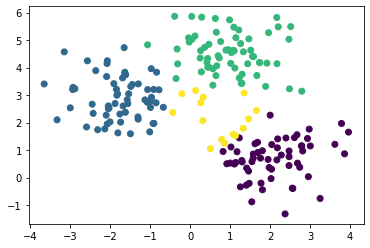

In [67]:
# 위 데이터(2개의 features)를 Meanshft 로 군집화한 결과를 시각화
plt.scatter(x=X[:, 0], y=X[:, 1], c = cluster_labels)

In [91]:
# 위 생성된 데이터를 데이터 프레임으로 생성
cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target']=y

best_bandw = estimate_bandwidth(X, quantile=0.2)

mean_shift = MeanShift(bandwidth=best_bandw)
cluster_labels = mean_shift.fit_predict(X)
print(np.unique(cluster_labels))

cluster_df['meanshift_label'] = cluster_labels
cluster_df.head()

[0 1 2 3]


,ftr1,ftr2,target,meanshift_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


In [92]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       2                  59
        3                   8
1       0                  67
2       1                  58
        3                   8
Name: meanshift_label, dtype: int64


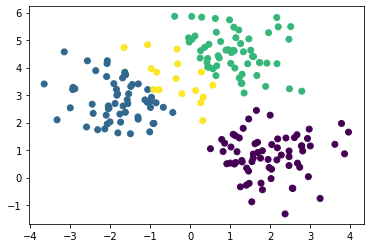

In [95]:
#  시각화
plt.scatter(x=X[:, 0], y=X[:, 1], c = cluster_df['meanshift_label'])
plt.show()